# Clustering With K Means - Python Tutorial

In [49]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
#%matplotlib inline

In [50]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

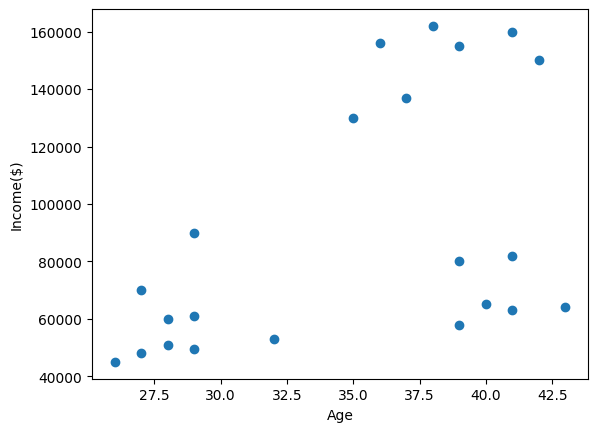

In [51]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [52]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [53]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [54]:
km.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.92000000e+01, 1.56600000e+05],
       [3.60000000e+01, 1.33500000e+05]])

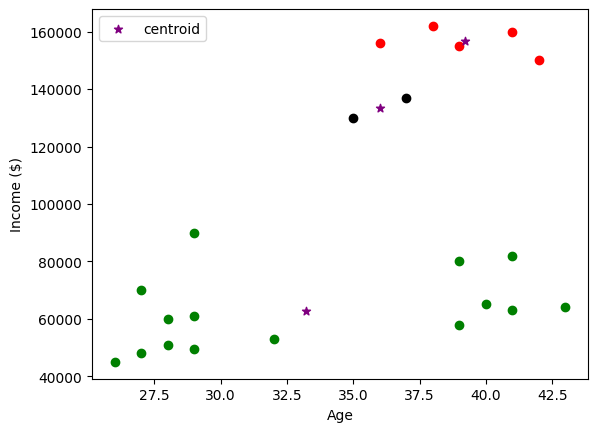

In [55]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scaler

In [56]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [57]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


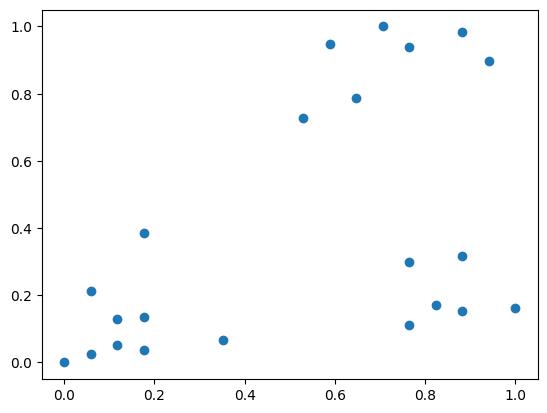

In [58]:
plt.scatter(df.Age,df['Income($)'])

In [59]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [60]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [61]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

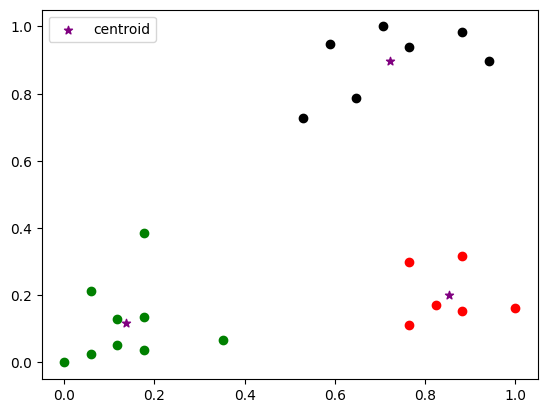

In [62]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot

In [63]:
sse = []
k_rng = range(2,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    numpy_array = np.array(df[['Age','Income($)']])
    km.fit(numpy_array)
    sse.append(km.inertia_)

In [64]:
sse

[2.3456144914725936,
 0.4750783498553096,
 0.4391474257674636,
 0.2798062931046179,
 0.23131597243625174,
 0.18850242078456822,
 0.1397684499538816,
 0.10663983840905437]

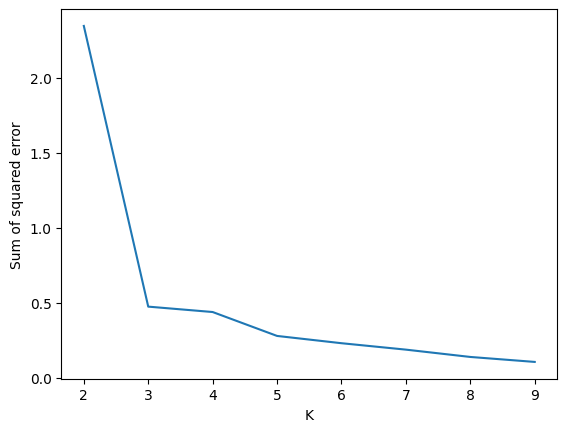

In [65]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# NLP Implementation

In [66]:
import pandas as pd
df = pd.read_csv("Movies_Dataset.csv")

KeyboardInterrupt: 

In [ ]:
df.head()

,id,title,overview
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,1,Jumanji,When siblings Judy and Peter discover an encha...
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...


**Explore the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45466 non-null  int64 
 1   title     45460 non-null  object
 2   overview  44507 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


# Data pre-processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
documents = df['overview'].values.astype("U")

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [ ]:
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [ ]:
df['cluster'] = model.labels_

In [ ]:
df.head()

,id,title,overview,cluster
0,0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",13
1,1,Jumanji,When siblings Judy and Peter discover an encha...,13
2,2,Grumpier Old Men,A family wedding reignites the ancient feud be...,3
3,3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",13
4,4,Father of the Bride Part II,Just when George Banks has recovered from his ...,4


In [ ]:
df19 = df[df.cluster==19]

In [ ]:
df19

,id,title,overview,cluster
51,51,Mighty Aphrodite,"When Lenny and his wife, Amanda, adopt a baby,...",19
60,60,Eye for an Eye,It's fire and brimstone time as grieving mothe...,19
84,84,Angels and Insects,"In Victorian England, wealthy patriarch Sir Ha...",19
128,128,Angela,A ten year old girl named Angela leads her six...,19
143,143,The Amazing Panda Adventure,Far from home in the lush bamboo forests of Ch...,19
...,...,...,...,...
45293,45293,Baby Bump,11-year-old Mickey House is no longer a child....,19
45395,45395,Dead Daughters,In present-day Moscow ghosts of three little g...,19
45400,45400,Yuri's Day,A mother loses her son during a winter visit t...,19
45404,45404,Bedouin,Rita's daughter is sick with leukemia. In orde...,19


In [ ]:
df12 = df[df.cluster==12]

In [ ]:
df12

,id,title,overview,cluster
44,44,To Die For,Susan wants to work in television and will the...,12
127,127,Pie in the Sky,Pie in the Sky is a 1996 American romantic com...,12
283,283,Nina Takes a Lover,Laura San Giacomo stars in this sexy comedy ab...,12
352,352,Four Weddings and a Funeral,Four Weddings And A Funeral is a British comed...,12
373,373,Speechless,A romantic comedy. Michael Keaton and Geena Da...,12
...,...,...,...,...
45209,45209,The Foxy Merkins,Two lesbian hookers wind their way through a w...,12
45216,45216,Themroc,"Made without proper language, just gibberish a...",12
45266,45266,Down Under,A black comedy set during the aftermath of the...,12
45269,45269,Chris Gethard: Career Suicide,"A comedy about depression, alcoholism, suicide...",12


# Output the results

In [ ]:
# output the result to a text file.

clusters = df.groupby('cluster')    

for cluster in clusters.groups:
    print("\n\n**********************\n")
    
    print("Cluster No: "+str(cluster))
    
    print("\n**********************\n\n")

    
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['title','overview']] # get title and overview columns
    print(data)



**********************

Cluster No: 0

**********************


                             title            overview
104                Nobody Loves Me  No overview found.
800                  Kaspar Hauser  No overview found.
972                      L'associ̩  No overview found.
1613                  Alien Escape  No overview found.
2230                 The Naked Man  No overview found.
...                            ...                 ...
44607       Ded Moroz i seriy volk  No overview found.
45251                Der Herr Karl  No overview found.
45272         Hemo The Magnificent  No overview found.
45292                 Hydrozagadka  No overview found.
45433  ���_len�� smutn�� princezna  No overview found.

[150 rows x 2 columns]


**********************

Cluster No: 1

**********************


                                                   title  \
7                                           Tom and Huck   
29                                        Shanghai Triad   
36  

In [ ]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 



AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'